# First partial exam

#### Importing Required Libraries

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Loading data

In [6]:
# Load dataset
df = pd.read_csv("ds-home-5min-avg.csv")
# Define feature as datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [7]:
df.head()

,date,pre,hum,tem,occ
0,2020-05-28 09:30:00,94822.75,61.94,29.97,L
1,2020-05-28 02:25:00,94442.35,54.76,31.07,L
2,2020-06-04 10:00:00,94712.64,61.19,30.09,E
3,2020-06-04 05:45:00,94564.56,59.78,30.46,L
4,2020-06-04 09:35:00,94725.16,61.41,30.00,L


In [8]:
# Look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1005 non-null   datetime64[ns]
 1   pre     1005 non-null   float64       
 2   hum     1005 non-null   float64       
 3   tem     1005 non-null   float64       
 4   occ     1005 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 39.4+ KB


### Plots for statistical distribution

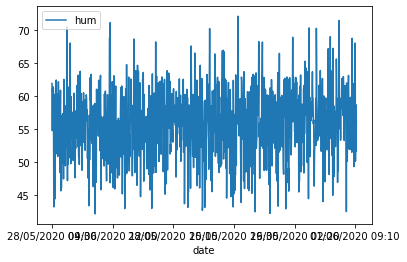

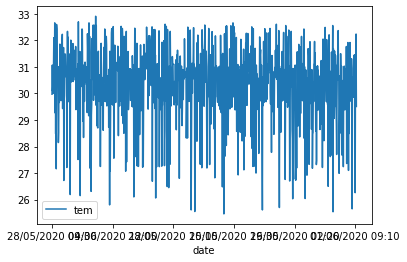

In [5]:
df.plot(x='date', y='pre')
df.plot(x='date', y='hum')
df.plot(x='date', y='tem')

### Correlation Matrix

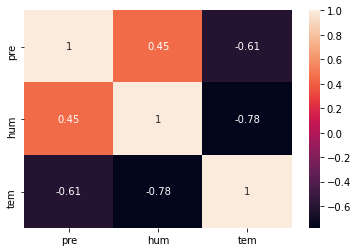

In [6]:
df = pd.DataFrame(df, columns=['pre','hum','tem'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Feature Selection

In [7]:
feature_cols = ['pre', 'hum', 'tem']
X = df[feature_cols]
y = df.hum

#### Splitting Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#### Biolding the Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train.astype('int'), y_train.astype('int')) # TODO: Not sure if int is good type
y_pred = clf.predict(X_test)

Accuracy: 0.9834437086092715
F Score: 0.8731711326648036
Precision: 0.8658333333333333
Recall: 0.8869281045751635


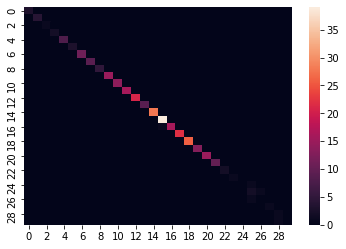

In [10]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test.round(), y_pred.round()))
print("F Score:",metrics.f1_score(y_test.round(), y_pred.round(), average="macro"))
print("Precision:",metrics.precision_score(y_test.round(), y_pred.round(), average="macro"))
print("Recall:",metrics.recall_score(y_test.round(), y_pred.round(), average="macro"))
sns.heatmap(metrics.confusion_matrix(y_test.round(), y_pred.round()))


#### Optimizing Decision Tree Performance

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train.astype('int'), y_train.astype('int'))
y_pred = clf.predict(X_test)

Accuracy: 0.5132450331125827
F Score: 0.17633483772902453
Precision: 0.13893585628146116
Recall: 0.26666666666666666


/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


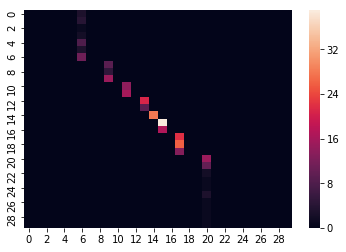

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test.round(), y_pred.round()))
print("F Score:",metrics.f1_score(y_test.round(), y_pred.round(), average="macro"))
print("Precision:",metrics.precision_score(y_test.round(), y_pred.round(), average="macro"))
print("Recall:",metrics.recall_score(y_test.round(), y_pred.round(), average="macro"))
sns.heatmap(metrics.confusion_matrix(y_test.round(), y_pred.round()))


### Neural nets

In [13]:
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [14]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 31)                279       
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 31)                279       
Total params: 383
Trainable params: 383
Non-

In [17]:
from keras.callbacks import TensorBoard

history_dict = {}

cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Test loss: 1.6809922456741333
Test accuracy: 0.4791252613067627
Model name: model_2
Test loss: 1.2721893787384033
Test accuracy: 0.6878727674484253
Model name: model_3
Test loss: 1.1428959369659424
Test accuracy: 0.7793240547180176


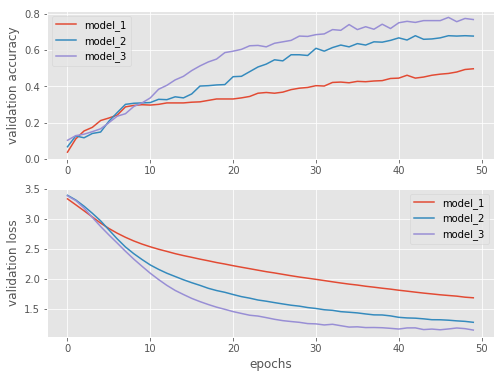

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

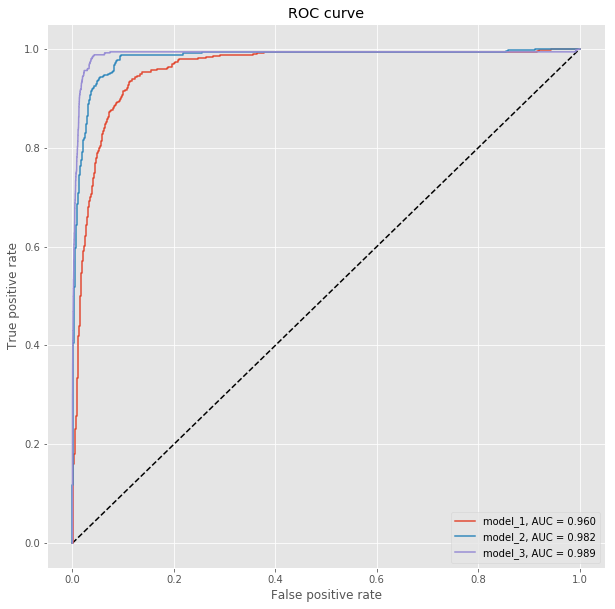

In [19]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.86 (+/- 0.04)
